# ML Course 2 - Practice (example of correction)

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [3]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6463,6464,15637411,Tochukwu,749,France,Male,30,1,0.00,2,0,1,126551.65,0
383,384,15622993,Boyd,709,Germany,Male,28,8,124695.72,2,1,0,145251.35,0
7473,7474,15638272,Tien,609,Spain,Male,32,4,99883.16,1,1,1,120594.85,0
994,995,15623521,Sozonov,838,Spain,Male,43,9,123105.88,2,1,0,145765.83,0
5523,5524,15625586,Monaldo,717,France,Male,35,4,0.00,1,1,1,167573.06,0
6150,6151,15625761,Maclean,632,Germany,Male,41,8,127205.32,4,1,0,93874.87,1
8163,8164,15572050,Yefimov,768,Germany,Male,48,3,122831.58,1,1,1,24533.89,1
8785,8786,15801293,Ni,850,Germany,Male,27,1,101278.25,2,1,1,26265.18,0
1954,1955,15600734,Townsend,624,Spain,Male,51,5,174397.21,2,1,1,172372.63,0
4440,4441,15760121,Maynard,712,France,Male,32,9,100606.02,1,1,0,165693.06,0


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice (3 points). Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.
- Prepare the data set (7 points). Example: dropping unrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.

# Data Exploration

## Basic informations

In [60]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data has :
- 10000 rows i.e. 10 000 clients,
- 14 columns

**Number of unique values:**


In [61]:
dataset_raw.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Amongst 10 000 client (customerId) :
- 2932 unique surnames are available. Some client have the same Surname.
- "Boolean" characteristics have 2 values (Gender, HasCrcard, IsActiveMember, Exited)
- The number of unique values for the other columns are listed also

**Statistics on numerical features:**

In [62]:
dataset_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Plots

### Feature distributions

**Histograms of the categorical features:**

If you need to install the Seaborn library: ```pip install seaborn```

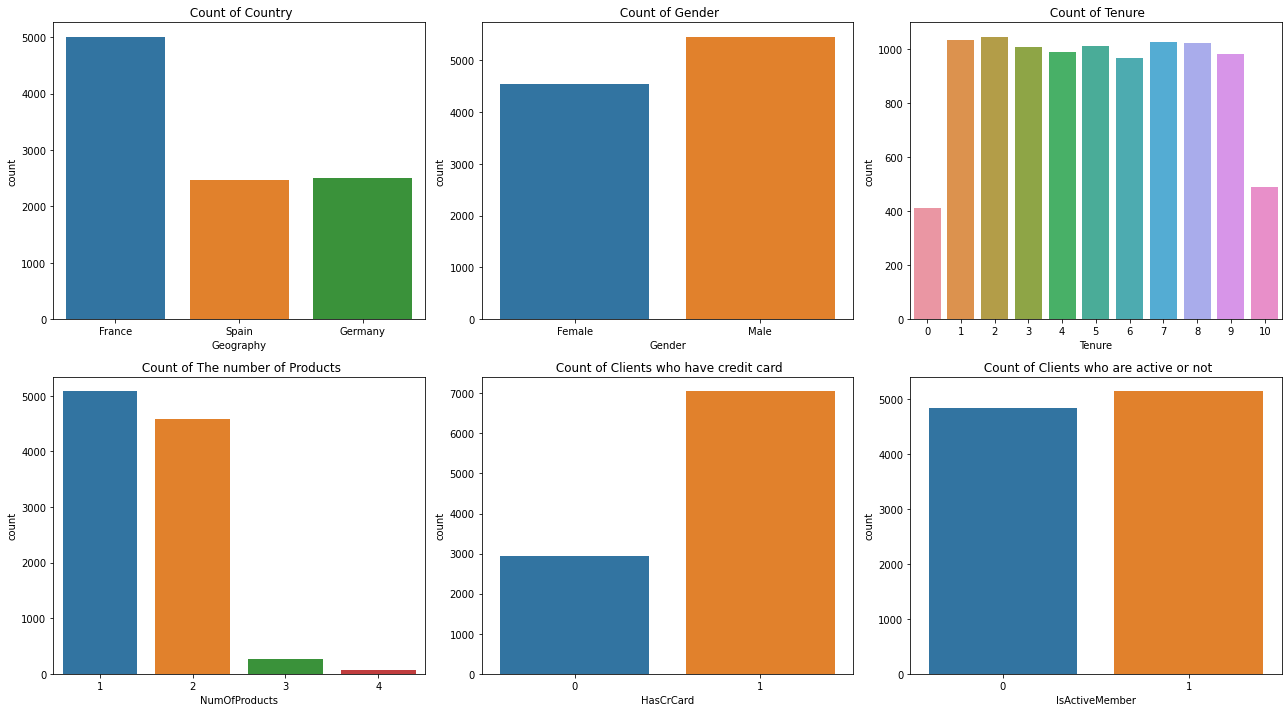

In [64]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
sns.countplot(x='Geography', data = dataset_raw, ax = axes[0,0])
axes[0, 0].set_title(' Count of Country')

sns.countplot(x='Gender', data = dataset_raw, ax = axes[0,1])
axes[0, 1].set_title(' Count of Gender')

sns.countplot(x='Tenure', data = dataset_raw, ax = axes[0,2])
axes[0, 2].set_title(' Count of Tenure')

sns.countplot(x='NumOfProducts', data = dataset_raw, ax = axes[1,0])
axes[1, 0].set_title(' Count of The number of Products')

sns.countplot(x='HasCrCard', data = dataset_raw, ax = axes[1,1])
axes[1, 1].set_title(' Count of Clients who have credit card')

sns.countplot(x='IsActiveMember', data = dataset_raw, ax = axes[1,2])
axes[1, 2].set_title(' Count of Clients who are active or not')

plt.tight_layout()
plt.show()

**Histograms of the numerical features:**

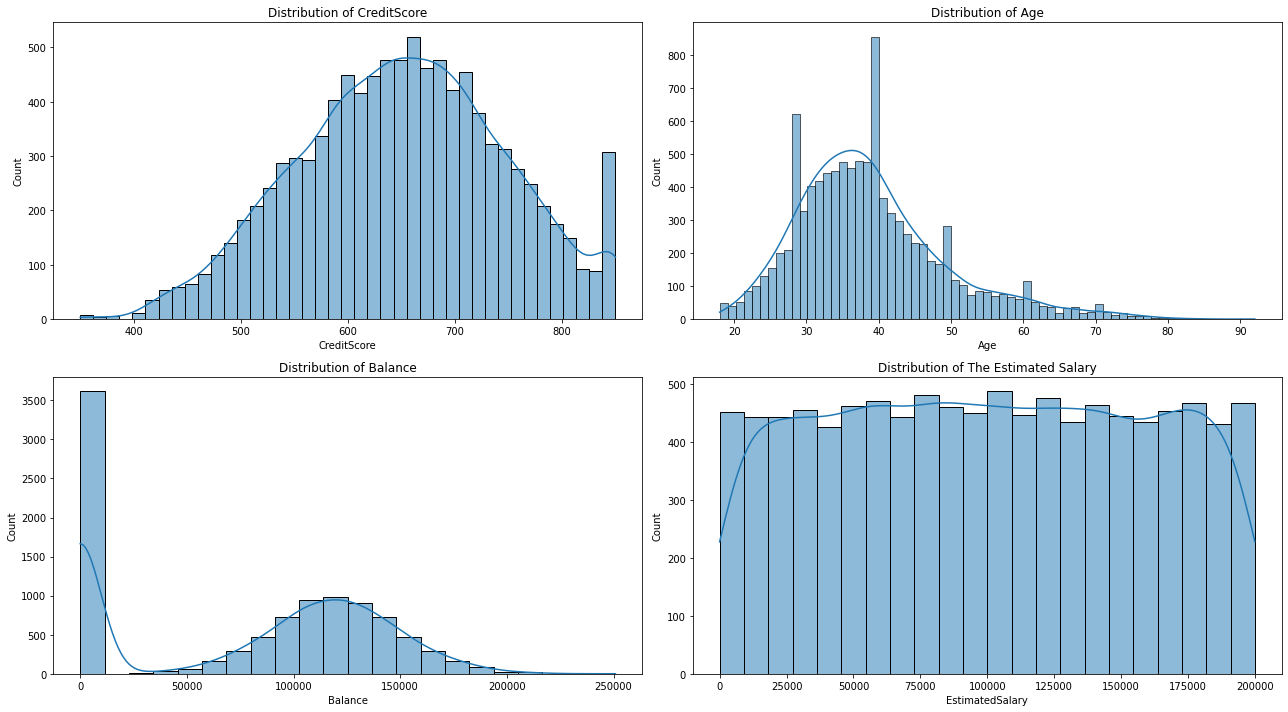

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
sns.histplot(x='CreditScore', data = dataset_raw, ax = axes[0,0], kde = True)
axes[0, 0].set_title('Distribution of CreditScore')

sns.histplot(x='Age', data = dataset_raw, ax = axes[0,1], kde = True)
axes[0, 1].set_title('Distribution of Age')


sns.histplot(x='Balance', data = dataset_raw, ax = axes[1,0], kde = True)
axes[1, 0].set_title('Distribution of Balance')

sns.histplot(x='EstimatedSalary', data = dataset_raw, ax = axes[1,1], kde = True)
axes[1, 1].set_title('Distribution of The Estimated Salary')

plt.tight_layout()
plt.show()

**Proportion of churn (target):**

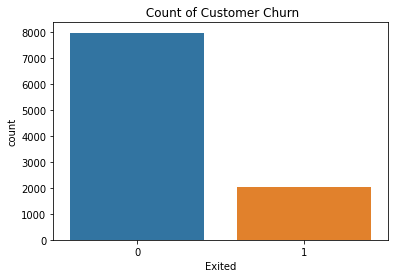

In [65]:
fig, ax = plt.subplots()
sns.countplot(x='Exited', data = dataset_raw, ax=ax)
ax.set_title(' Count of Customer Churn')

plt.show()

### Comparison between features

In [67]:
correlation = dataset_raw.corr()

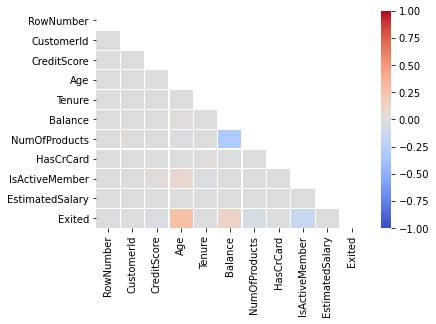

In [68]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  # Mask to keep only one half of the symetrical matrix
sns.heatmap(correlation,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            mask = mask,
            linewidths=0.1)
plt.show()

Exited seems to be somehow correlated with Age, IsActiveMember and Balance.

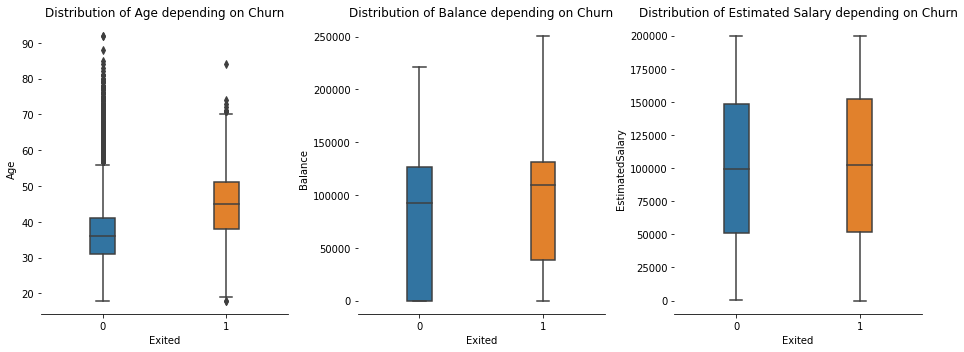

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

sns.boxplot(y='Age', x='Exited', data = dataset_raw, width = 0.2, ax = axes[0])
axes[0].set_title('Distribution of Age depending on Churn')

sns.boxplot(y='Balance', x='Exited', data = dataset_raw, width = 0.2, ax = axes[1])
axes[1].set_title('Distribution of Balance depending on Churn')

sns.boxplot(y='EstimatedSalary', x='Exited', data = dataset_raw, width = 0.2, ax = axes[2])
axes[2].set_title('Distribution of Estimated Salary depending on Churn')

sns.despine(left=True)

plt.tight_layout()
plt.show()

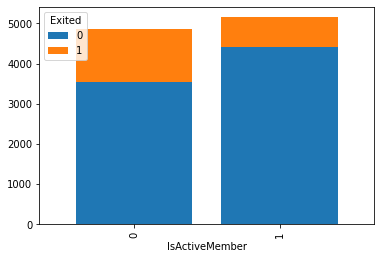

In [31]:
Tenure = dataset_raw.groupby(['IsActiveMember','Exited']).size().reset_index().pivot(index='IsActiveMember', columns='Exited', values=0)
Tenure.plot(kind='bar', stacked=True, width=0.8)
plt.show()

It seem more obvious now that Age, IsActiveMember and Balance have an impact on Exited, on the contrary to EstimatedSalary.

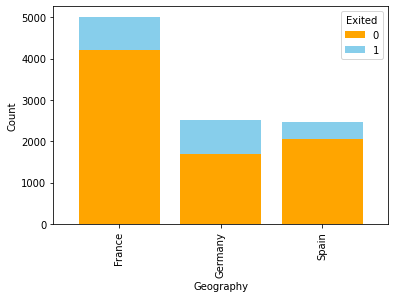

In [35]:
df_plot = dataset_raw.groupby(['Geography', 'Exited']).size().reset_index().pivot(index='Geography', columns='Exited', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show()

## Dropping unrelevant data

In [69]:
dataset_raw['CustomerId'].duplicated().sum()

0

In [70]:
dataset_raw.duplicated().sum()

0

In [71]:
print((dataset_raw['Age'] <= 0).sum())
print((dataset_raw['Tenure'] < 0).sum())
print((dataset_raw['NumOfProducts'] <= 0).sum())
print((dataset_raw['EstimatedSalary'] < 0).sum())
print((dataset_raw['CreditScore'] <= 0).sum())

0
0
0
0
0


RowNumber, CustomerId and Surname seem not relevant for us.

In [72]:
dataset = dataset_raw.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset.sample(n=5, random_state = 20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9957,633,France,Male,25,1,0.00,1,1,0,100598.98,0
1687,850,Spain,Male,37,4,137204.77,1,1,1,28865.59,0
2116,701,France,Male,44,7,0.00,2,1,0,23425.78,0
231,610,France,Male,40,0,0.00,2,1,0,62232.60,0
2780,778,Spain,Male,40,8,104291.41,2,1,1,117507.11,0


## Prepare features and response


**Response:**

In [83]:
y = dataset['Exited']
print(y[:6])

0    1
1    0
2    1
3    0
4    0
5    1
Name: Exited, dtype: int64


**Features:**

In [126]:
X = dataset.drop('Exited', axis=1)
X.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71


## Data encoding

### Label encoding for boolean data

Only Gender is not already numerical. (Amongst Gender, HasCrcard, IsActiveMember, Exited)

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X['Gender'])
X['Gender'] = label_encoder.transform(X['Gender'])
X.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71


### One hot encoder for categorical data

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], remainder='passthrough')

X = pd.DataFrame(oh_encoder.fit_transform(X))
X.columns = oh_encoder.get_feature_names()

X.head(6)

,encoder__x0_France,encoder__x0_Germany,encoder__x0_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,0.0,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71


**Nice alternative:**

In [99]:
pd.get_dummies(X, columns=['Geography'], prefix=['is'])

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,is_France,is_Germany,is_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


## Data set split

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [188]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


## Scaling

We will scale the features that have a spread distribution:

In [189]:
features_to_scale = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
X_train[features_to_scale].head(6)

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
651,720.0,52.0,0.00,7.0,1.0,14781.12
6560,577.0,32.0,0.00,1.0,2.0,9902.39
8974,706.0,43.0,0.00,1.0,2.0,31962.77
2348,824.0,45.0,129209.48,3.0,1.0,60151.77
5670,497.0,32.0,0.00,8.0,2.0,67364.42
7454,732.0,46.0,0.00,0.0,2.0,184350.78


In [190]:
# pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test.loc[:,features_to_scale] = scaler.transform(X_test[features_to_scale])
X_train[features_to_scale].head(6)

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
651,0.719980,1.256181,-1.228601,0.683089,-0.910949,-1.480501
6560,-0.753272,-0.659527,-1.228601,-1.397668,0.800932,-1.565230
8974,0.575745,0.394112,-1.228601,-1.397668,0.800932,-1.182108
2348,1.791436,0.585683,0.844319,-0.704082,-0.910949,-0.692551
5670,-1.577469,-0.659527,-1.228601,1.029882,0.800932,-0.567289
7454,0.843609,0.681468,-1.228601,-1.744461,0.800932,1.464408


In [191]:
X_train.head(6)

,encoder__x0_France,encoder__x0_Germany,encoder__x0_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
651,1.0,0.0,0.0,0.719980,1.0,1.256181,0.683089,-1.228601,-0.910949,1.0,1.0,-1.480501
6560,1.0,0.0,0.0,-0.753272,0.0,-0.659527,-1.397668,-1.228601,0.800932,1.0,0.0,-1.565230
8974,0.0,0.0,1.0,0.575745,0.0,0.394112,-1.397668,-1.228601,0.800932,1.0,0.0,-1.182108
2348,1.0,0.0,0.0,1.791436,1.0,0.585683,-0.704082,0.844319,-0.910949,0.0,0.0,-0.692551
5670,1.0,0.0,0.0,-1.577469,1.0,-0.659527,1.029882,-1.228601,0.800932,1.0,0.0,-0.567289
7454,1.0,0.0,0.0,0.843609,1.0,0.681468,-1.744461,-1.228601,0.800932,1.0,1.0,1.464408
